In [1]:
import seaborn as sns

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
iris["species"].unique()  # 품종 확인

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
from sklearn.preprocessing import LabelEncoder

import pandas as pd

X=iris.iloc[:, :4].values # 독립변수
y=iris.iloc[:,4].values  #종속변수

print(y[:5])

encoder=LabelEncoder() #문자열에 label을 붙임
y1=encoder.fit_transform(y)
print(y1[:5])

y2=pd.get_dummies(y1).values #종속변수에 대한 원핫인코딩 처리
print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[ True False False]
 [ True False False]
 [ True False False]
 [ True False False]
 [ True False False]]


In [4]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
y2

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y2, test_size=0.2, stratify=y, random_state=10
)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# 모델 생성
model = Sequential()

model.add(Dense(64, input_shape=(4,), activation="relu"))
#           Dense(output, input_shape 입력 차원)
#                       입력노드:변수4개
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))

sgd = SGD(learning_rate=0.01)
#    경사하강법	학습률
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
#               손실                             최적화(오차수정)    평가기준:정확도

c:\python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,675 (18.26 KB)

 Trainable params: 4,675 (18.26 KB)

 Non-trainable params: 0 (0.00 B)

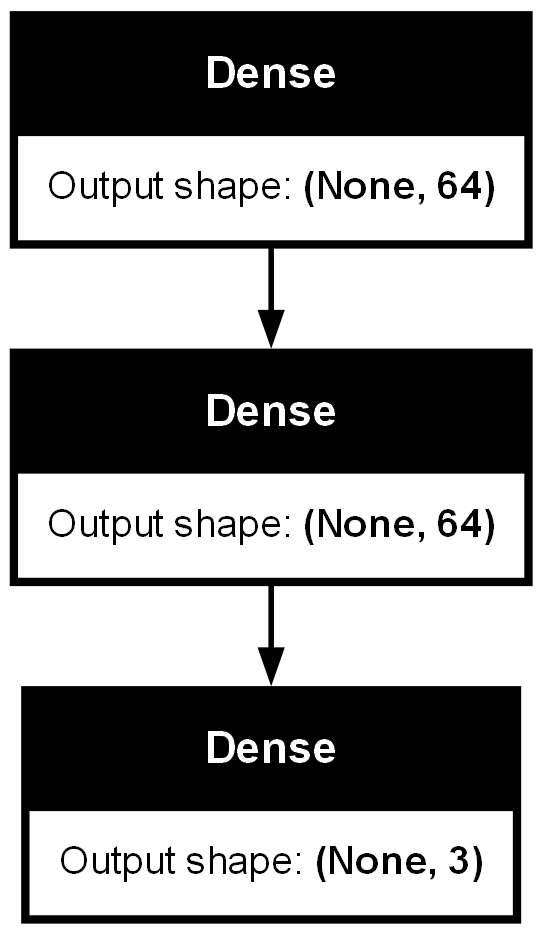

In [9]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

es = EarlyStopping(monitor="val_loss", patience=10)
# 학습 과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장
mc = ModelCheckpoint("iris_best.keras", save_best_only=True)
# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션
rlr = ReduceLROnPlateau(factor=0.1, patience=5)  # 기존 학습률*factor (배수)

# 학습 과정의 주요 history를 csv로 저장
csvlogger = CSVLogger("mylog.csv")

hist = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    callbacks=[es, mc, rlr, csvlogger],
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.3320 - loss: 0.9694 - val_accuracy: 0.5000 - val_loss: 0.9236 - learning_rate: 0.0100
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6055 - loss: 0.8774 - val_accuracy: 0.7083 - val_loss: 0.8501 - learning_rate: 0.0100
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5742 - loss: 0.8502 - val_accuracy: 0.9167 - val_loss: 0.8255 - learning_rate: 0.0100
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8958 - loss: 0.8116 - val_accuracy: 0.9583 - val_loss: 0.7891 - learning_rate: 0.0100
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9583 - loss: 0.7927 - val_accuracy: 0.9167 - val_loss: 0.7649 - learning_rate: 0.0100
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9440 - loss: 0.7592 - val_accuracy: 0.9583 - val_loss: 0.7178 - learning_rate: 0.0100
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8841 - loss: 0.7561 - val_accuracy: 

In [11]:
from keras.models import load_model

model = load_model("iris_best.keras")
model.evaluate(X_test, y_test, verbose=0)

[0.29068809747695923, 0.9333333373069763]

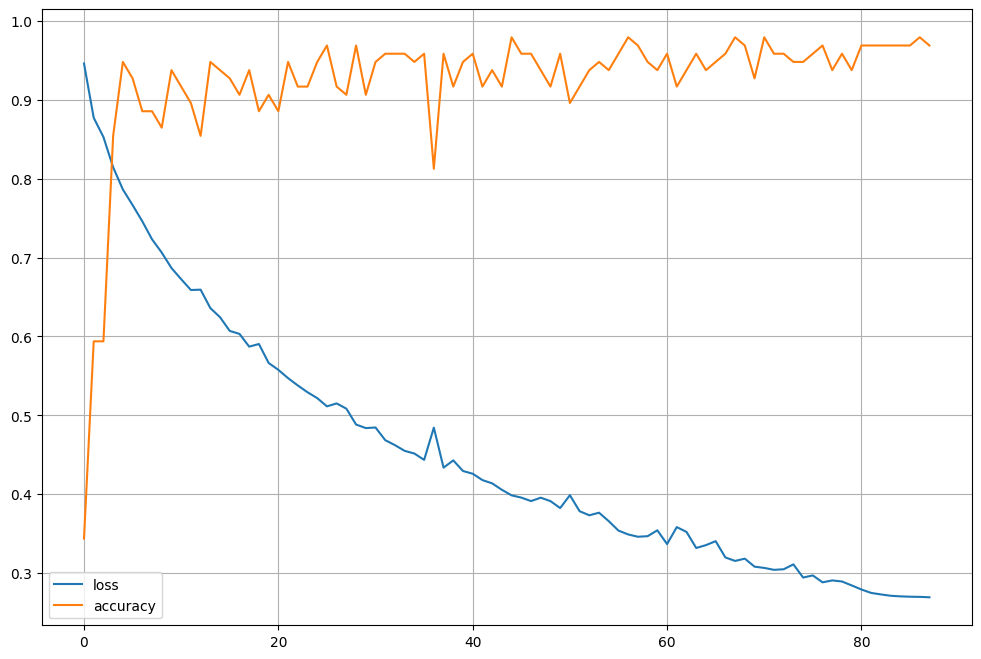

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(hist.history["loss"])
plt.plot(hist.history["accuracy"])
plt.legend(["loss", "accuracy"])
plt.grid()
plt.show()

In [13]:
# 모델평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("정확도 : {:.2f}".format(accuracy))

정확도 : 0.93


In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
print(pred[:10])

y_test_class = np.argmax(y_test, axis=1)
pred_class = np.argmax(pred, axis=1)
print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class, pred_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1.6719183e-02 4.9354956e-01 4.8973125e-01]
 [9.0874285e-01 8.7701529e-02 3.5556483e-03]
 [1.2950411e-02 3.7466761e-01 6.1238199e-01]
 [7.8827199e-03 3.8315564e-01 6.0896158e-01]
 [8.6956270e-02 6.7952311e-01 2.3352061e-01]
 [3.7320433e-03 2.7595559e-01 7.2031236e-01]
 [8.8911569e-01 1.0572336e-01 5.1609958e-03]
 [2.0663787e-03 1.6533865e-01 8.3259505e-01]
 [1.8232623e-03 1.5366384e-01 8.4451288e-01]
 [9.7479659e-01 2.4731584e-02 4.7175746e-04]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 2 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


In [15]:
model.save("c:/data/iris/iris.keras")